In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import datetime
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
plt.style.use('fivethirtyeight')

In [3]:
%time data=pd.read_csv('startup_funding.csv')

Wall time: 192 ms


In [4]:
pd.set_option('max_columns',100)
data.head(20)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
5,6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",NaN
6,7,10/01/2020,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,"15,00,00,000",NaN
7,8,12/12/2019,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,"60,00,000",NaN
8,9,06/12/2019,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",NaN
9,10,03/12/2019,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,"5,00,00,000",NaN


In [8]:
data

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [6]:
#Check for missing values in columns
data.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [14]:
#Data cleaning across the dataframe

data.columns=['S/N','Date','StartupName','IndustryVertical','SubVertical','City','InvestorsName','InvestorType','AmountInUSD','Remarks']
def clean_strings(x):
    return str(x).replace('\\xc2\\xa0','').replace('\\\\xc2\\\\xa0','')
for col in ['StartupName','IndustryVertical','SubVertical','City','InvestorsName','InvestorType','AmountInUSD','Remarks']:
    data[col]=data[col].apply(lambda x: clean_strings(x))
    
data.head()

,S/N,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestorType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [15]:
##Data cleaning
data=data.drop(['Remarks'],axis=1)
data.columns

Index(['S/N', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestorType', 'AmountInUSD'],
      dtype='object')

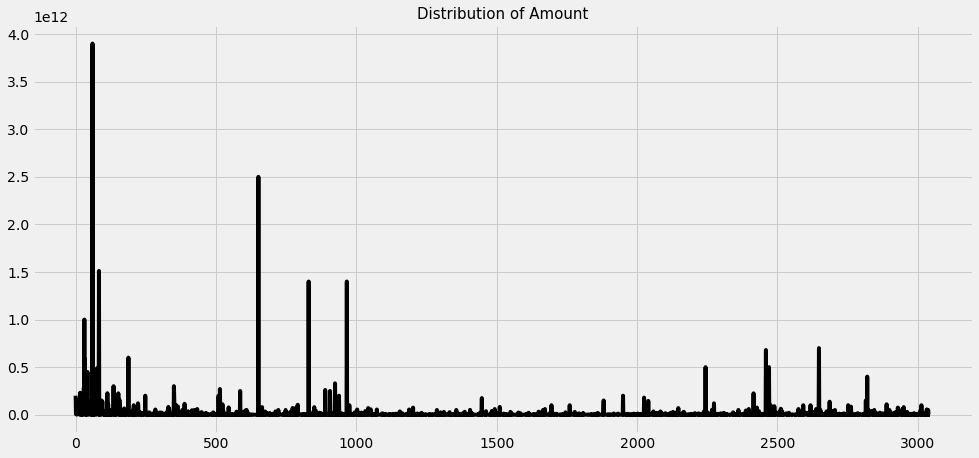

In [32]:
##Data cleaning on the amountInUSD column

#Conversion of the column to numerics
def clean_amount(x):
    x=''.join([c for c in str(x) if c in ['0','1','2','3','4','5','6','7','8','9']])
    x=str(x).replace(',','').replace('+','')
    x=str(x).lower().replace('undisclosed','')
    x=str(x).lower().replace('n/a','')
    if x=='':
        x='-999'
    return x
#Application of the function the AmountInUSD column
data['AmountInUSD']=data['AmountInUSD'].apply(lambda x: float(clean_amount(x)))

#Line plot of the AmountInUSD column
plt.rcParams['figure.figsize']=(15,7)
data['AmountInUSD'].plot(kind='line', color='black')
plt.title('Distribution of Amount', fontsize=15)
plt.show()


In [43]:
import warnings
warnings.filterwarnings('ignore')

#Cleaning the date column

data['Date'][data['Date']=='12/05.2015']='12/05/2015'
data['Date'][data['Date']=='13/04.2015']='13/04/2015'
data['Date'][data['Date']=='15/01.2015']='15/01/2015'
data['Date'][data['Date']=='22/01.2015']='22/01/2015'
data['Date'][data['Date']=='05/072018']='05/07/2018'
data['Date'][data['Date']=='01/07/015']='01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015']='10/07/2015'

In [46]:
#Describe the categorical columns in the dataset to get some insight
data.describe(include='object')

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestorType
count,3044,3044,3044,3044,3044,3044,3044
unique,1031,2457,822,1943,108,2409,56
top,08/07/2015,Ola Cabs,Consumer Internet,nan,Bangalore,Undisclosed Investors,Private Equity
freq,11,8,941,936,701,39,1356
